In [67]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import pandas 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.cross_validation import permutation_test_score
from sklearn.svm import SVC 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [68]:
df = pandas.read_csv( 'feature_sets/expression_combined.csv', index_col=0 ) 

In [69]:
# scale features and separate into predictors

scl = StandardScaler()
X = scl.fit_transform( df.ix[:,:-1] )
y = df.ix[:,-1:].as_matrix().ravel()

print X.shape
print y.shape

(126, 76)
(126,)


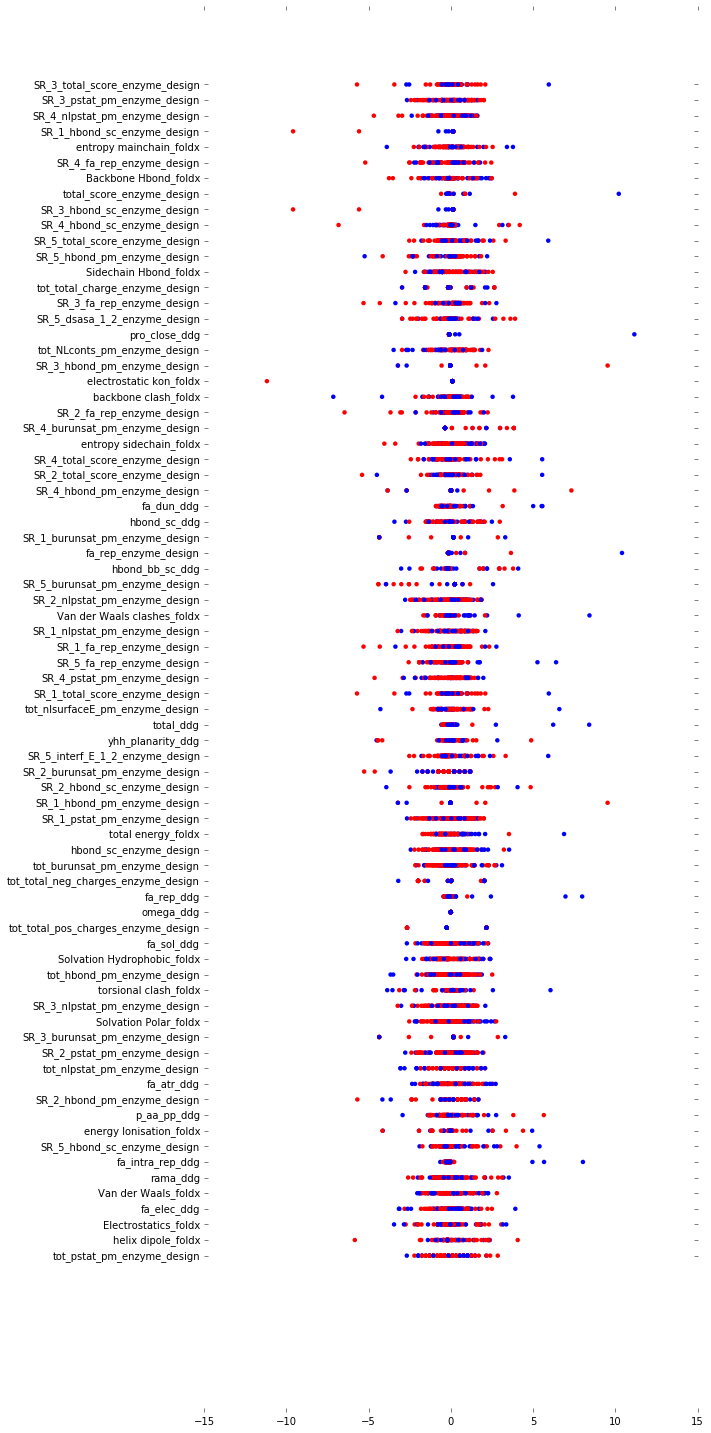

In [70]:
my_feats = df.columns[:-1]

plt.figure( figsize=(10,20) ) 

for i, feat in enumerate( my_feats ):
    plt.scatter( X[:,i], [ i ] * len( X ), c=y, lw=0, cmap='bwr' )
    
plt.yticks( range( len( my_feats ) ), my_feats ) 
plt.tight_layout()
plt.box( 0 ) 
#plt.xlim( -0.01, 1.01 ) 
plt.show()

In [71]:
param_grid = [
    { 
        'svm__class_weight': [ 'balanced' ], 
        'svm__probability': [ True ], 
        'svm__C': [ 0.3, 3, 30 ], 
        'svm__kernel': [ 'poly', 'rbf', 'linear' ], 
        'kbest__k': [ 2, 3, 6, 9, 20, 30, 40 ], 
    }
]

matt_score = make_scorer( matthews_corrcoef ) 
skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
pln = Pipeline([
    ( 'kbest', SelectKBest() ), 
    ( 'svm', SVC() )
])
grid_search = GridSearchCV( pln, param_grid=param_grid, cv=skf, scoring=matt_score ) 

In [72]:
grid_search.fit( X, y ) 

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=10, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x114eb19b0>)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kbest__k': [2, 3, 6, 9, 20, 30, 40], 'svm__probability': [True], 'svm__class_weight': ['balanced'], 'svm__C': [0.3, 3, 30], 'svm__kernel': ['poly', 'rbf', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(matthews_corrcoef), verbose=0)

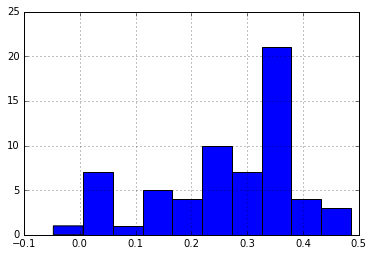

In [73]:
results = pandas.DataFrame( grid_search.grid_scores_ ) 
#print results.sort_values( 'mean_validation_score' ) 
results.mean_validation_score.hist()

In [74]:
preds = grid_search.predict( X ) 
my_zip = zip( df.index, y, preds, ) 
calls = pandas.DataFrame( my_zip, columns=['name', 'true', 'pred'] )
calls[ 'correct' ] = ( calls.true == calls.pred ).astype( int ) 
print 'percent correctly predicted',  calls.correct.sum() / (len( calls ) * 1.)
print 'matt. corr.', matthews_corrcoef( calls.true, calls.pred ) 
print calls[ ( calls.correct == 0 ) ] 

percent correctly predicted 0.761904761905
matt. corr. 0.505654808224
      name  true  pred  correct
4    W325H     1     0        0
5     S16N     0     1        0
7    N293D     1     0        0
8    N293Q     1     0        0
11   R240D     1     0        0
19   W399A     0     1        0
20   E164G     0     1        0
21   Y295G     1     0        0
24   Y295A     1     0        0
27   E222Y     0     1        0
28    R76A     0     1        0
35   F415A     1     0        0
37   F415N     1     0        0
38   D403A     0     1        0
41   E222R     0     1        0
43   I244N     0     1        0
47   H315N     0     1        0
48   T296A     0     1        0
50    Y18A     1     0        0
71   W325A     1     0        0
84   N354A     1     0        0
91   M323A     1     0        0
94   W325C     1     0        0
104  L171R     1     0        0
109  H379R     1     0        0
110   S17E     1     0        0
111  W120F     1     0        0
112  C167Q     1     0        0
11